

*   S346175 - Herman Berg
*   S344080 - Björn Pettersson



In [65]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as plt
from datetime import datetime

In [66]:
#Import CSV file
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI/master/assignment1/Ruter_data.csv'
df = pd.read_csv(url, sep=';')

In [67]:
df.replace(to_replace=':', value=np.nan, inplace=True) #Make cells containing only colon empty
df.dropna(inplace = True)
df = df.reset_index(drop=True)

#1.1 Unique features
1. Percent of bus passenger capacity filled
2. Time at stop
3. Delay
4. Bus line (Linjenavn)
5. Municipality (Kommune)

# Feature 1
Calculate passenger capacity filled percent, per departure

In [68]:
for i, row in df.iterrows(): #Loop through every row
  capacity = row['Kjøretøy_Kapasitet']
  passengers = row['Passasjerer_Ombord']

  if passengers>0: #If 1 or more passengers, calculate percentage
    df.at[i, 'Passenger_Capacity_Filled'] = passengers / capacity
  else: #If no passengers, set to zero
    df.at[i, 'Passenger_Capacity_Filled'] = 0

Method for standardizing time (24:00 -> 00:00)

In [69]:
def pad_int(time_int):
  # Format int to fit datetime
  return str("%02d" % time_int)

def standardize_time(time_str):
  # Change time over 23:59 to start at 00:00
  # For example 24:30 -> 00:30

  # Split into hours, minutes and seconds
  split_str = time_str.split(':')

  try: 
    hour = int(split_str[0])
    # If hour is 24 or greater, subtract 24
    if hour > 23: hour -= 24
  except: hour = 0

  try: minute = int(split_str[1])
  except: minute = 0
  
  try: second = int(split_str[2])
  except: second = 0
 
  # Convert back into string
  return pad_int(hour)+":"+pad_int(minute)+":"+pad_int(second)
    


Method for converting date and time string to datetime object

In [70]:
def parse_datetime(date_str, time_str):
  # Combine date and time to datetime object
  standardized_time_str = standardize_time(time_str)
  date_time_str = date_str+'-'+standardized_time_str  
  return datetime.strptime(date_time_str, '%d/%m/%Y-%H:%M:%S')

#Feature 2 & 3
Calculate time at stop and delay time

In [71]:
for i, row in df.iterrows(): #Loop through every departure
  dato = row['Dato']

  # Create datetime objects for each timestamp
  faktisk_ankomst = parse_datetime(dato, row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'])
  faktisk_avgang = parse_datetime(dato, row['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'])

  planlagt_ankomst = parse_datetime(dato, row['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'])
  planlagt_avgang = parse_datetime(dato, row['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'])
  
  # Feature 3
  # Calculate time at stop from actual departure timestamp and actual arrival timestamp
  tid_på_stopp = faktisk_avgang - faktisk_ankomst
  df.at[i, 'Tid_På_Stopp_Sekunder'] = tid_på_stopp.total_seconds()

  # Feature 4
  # Calculate delay from planned to actual timestamp
  tid_forsinkelse = faktisk_avgang - planlagt_avgang
  df.at[i, 'Tid_Forsinkelse_Sekunder'] = tid_forsinkelse.total_seconds()

#Feature 4 & 5
Feature 4 and 5 (Linjenavn & Kommune) are already prepared in the dataset.

#Feature Engineering
1. Average percentage of bus capacity filled, per line
2. Average delay, per line
3. Amount of departures, per municipality
4. Average time at stop, per municipality
5. Average passengers, per municipality

#Feature Engineering 1
Average percentage of bus capacity filled, per line

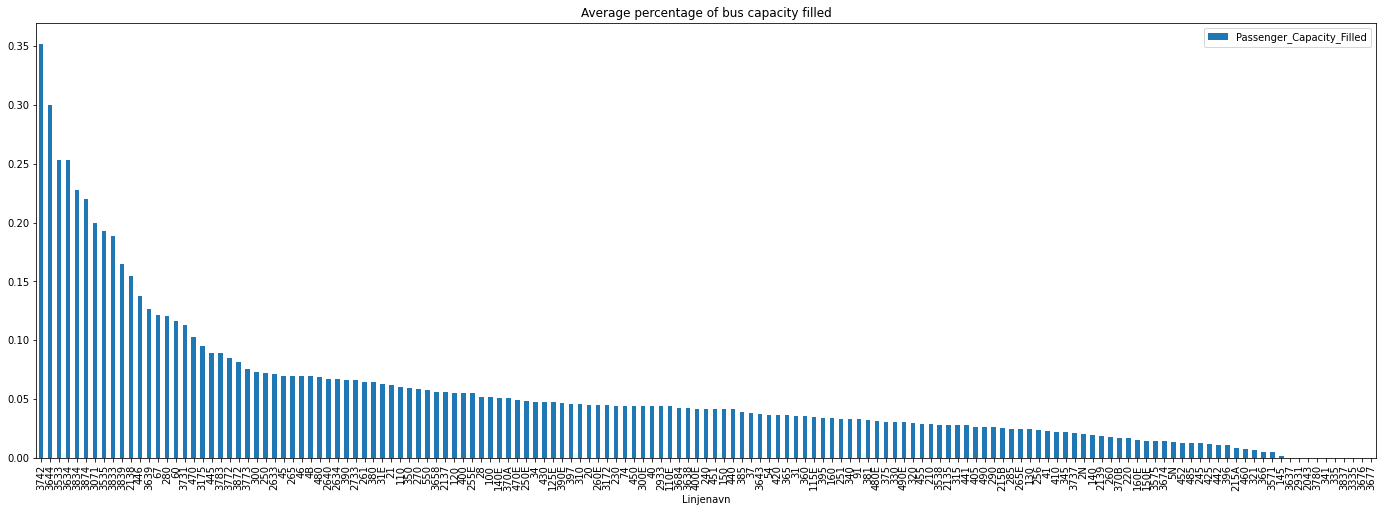

In [72]:
busCapacityPerLine = df[['Linjenavn', 'Passenger_Capacity_Filled']].groupby(['Linjenavn']).mean().sort_values('Passenger_Capacity_Filled', ascending=False)

busCapacityPerLine.plot.bar(figsize=(24,8), title='Average percentage of bus capacity filled')

#Feature Engineering 2
Average delay per stop, per line

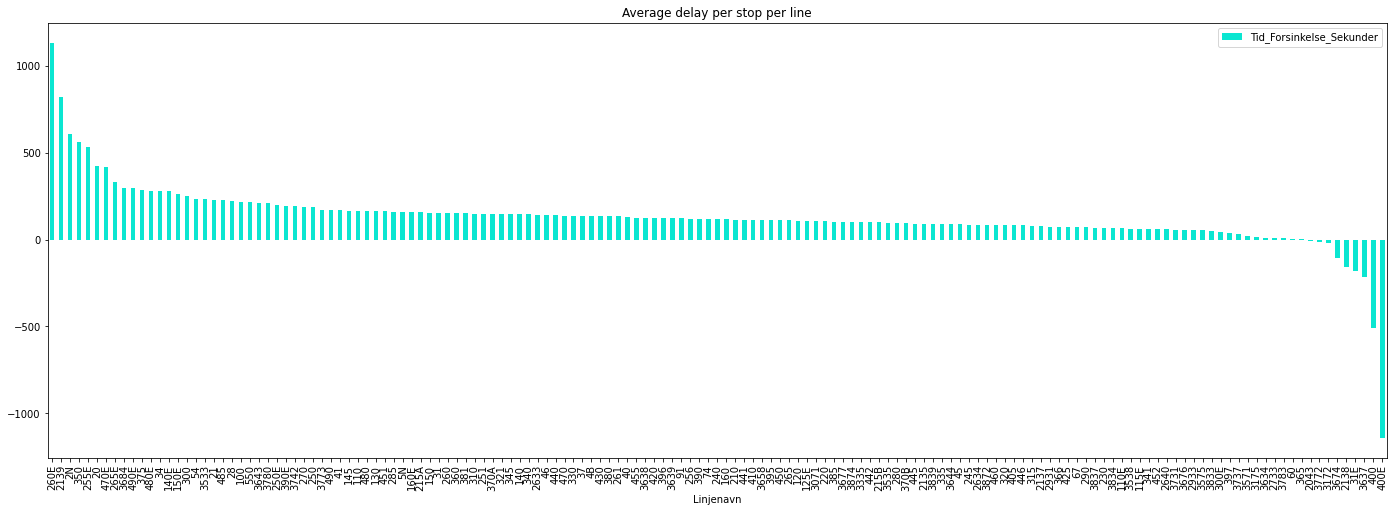

In [73]:
busCapacityPerLine = df[['Linjenavn', 'Tid_Forsinkelse_Sekunder']].groupby(['Linjenavn']).mean().sort_values('Tid_Forsinkelse_Sekunder', ascending=False)

busCapacityPerLine.plot.bar(figsize=(24,8), title='Average delay per stop per line', color='#0ae6d1')

#Feature Engineering 3
Amount of departures per day, per municipality

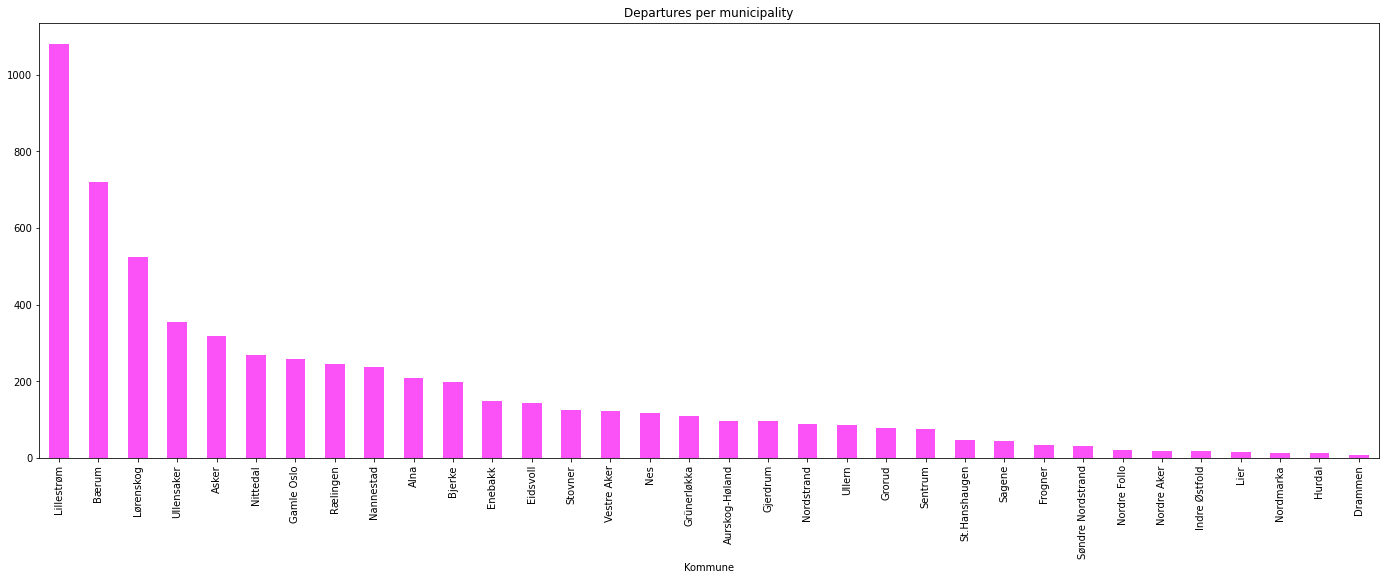

In [74]:
departuresPerMunicipality = df.groupby(['Kommune']).size().sort_values(ascending=False)

departuresPerMunicipality.plot.bar(figsize=(24,8), title='Departures per municipality', color='#fa52f7')

#Feature Engineering 4
Average time at stop, per municipality

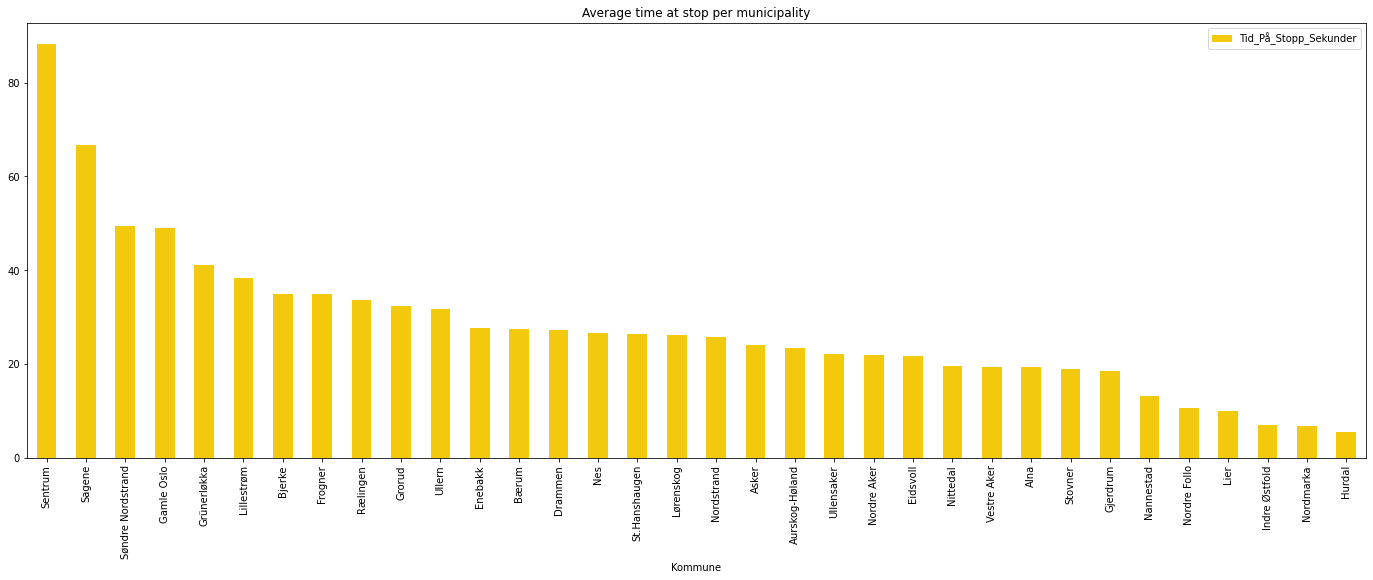

In [75]:
busCapacityPerLine = df[['Kommune', 'Tid_På_Stopp_Sekunder']].groupby(['Kommune']).mean().sort_values('Tid_På_Stopp_Sekunder', ascending=False)

busCapacityPerLine.plot.bar(figsize=(24,8), title='Average time at stop per municipality', color='#f2c90d')

#Feature Engineering 5
Average passengers, per municipality

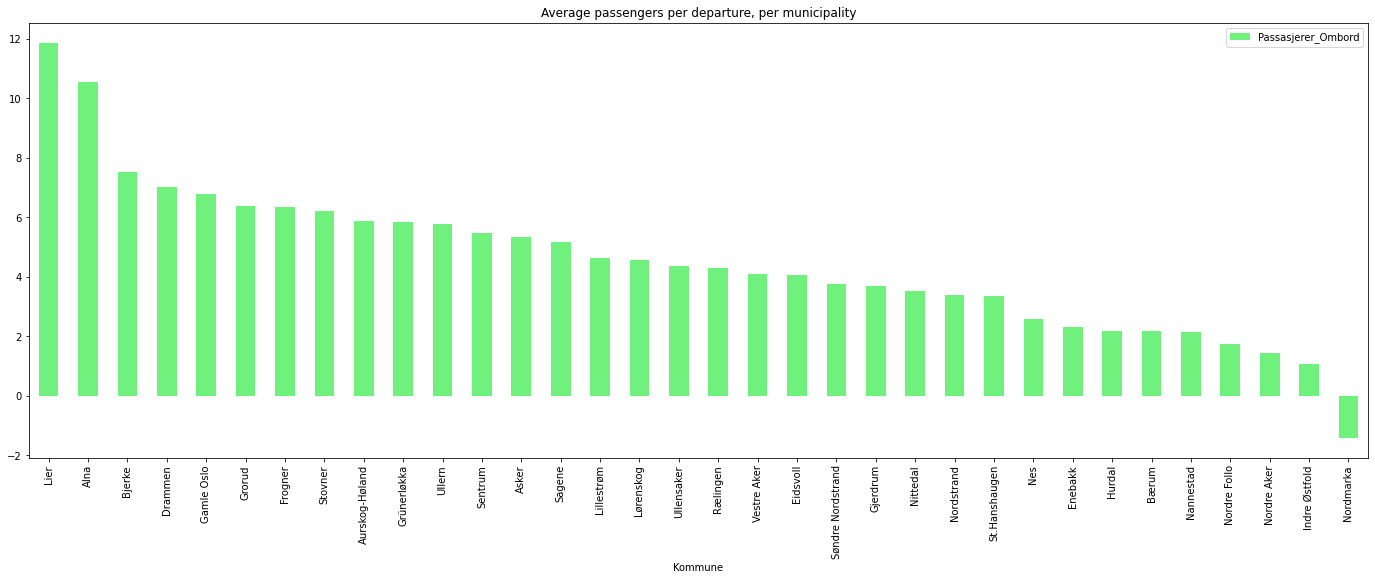

In [76]:
busCapacityPerLine = df[['Kommune', 'Passasjerer_Ombord']].groupby(['Kommune']).mean().sort_values('Passasjerer_Ombord', ascending=False)

busCapacityPerLine.plot.bar(figsize=(24,8), title='Average passengers per departure, per municipality', color='#70f07c')